# Multiple Linear Regression

In this notebook, we will implement multiple linear regression using the dataset of 50 startups. The dataset contains the following columns: R&D Spend, Administration, Marketing Spend, State, and Profit. We will analyse these features to understand how to predict the profit of a startup based on these features.

## Importing the libraries and dataset

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from ml_code.utils import load_data

dataframe = load_data("50_Startups.csv")
dataframe.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data analysis

In [29]:
dataframe.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [30]:
# Checking for missing values
dataframe.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [31]:
# Checking for categorical data
dataframe["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

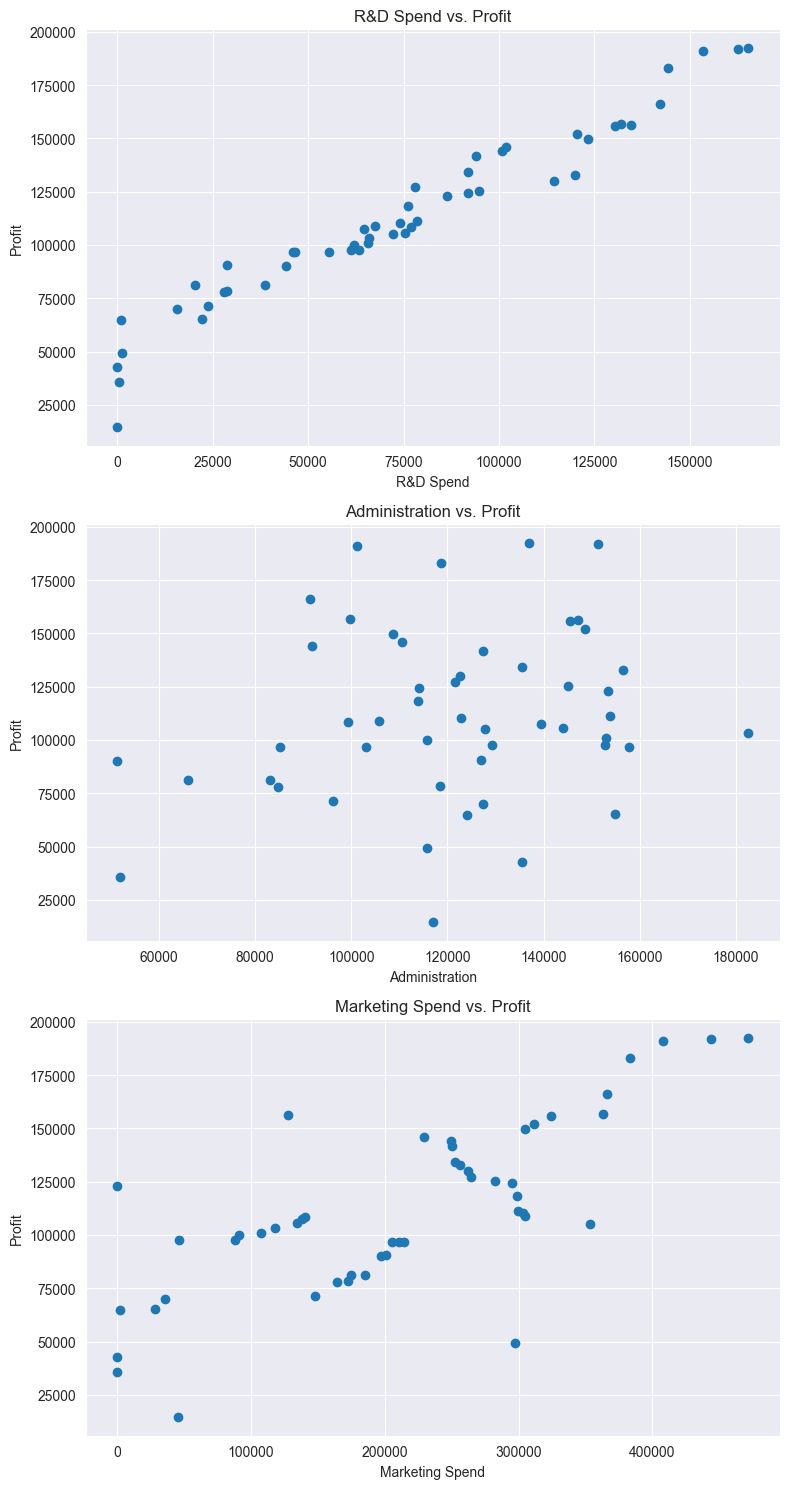

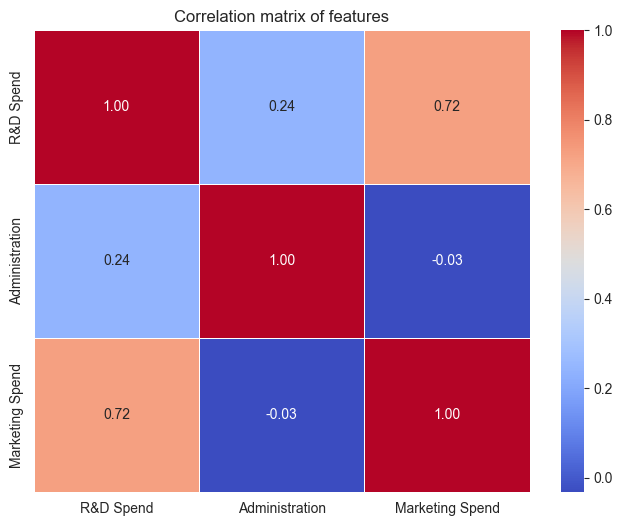

In [32]:
# Check our assumptions - linearity between features and labels, no multicollinearity

# Linearity between features and labels
fig, axs = plt.subplots(3, 1, figsize=(8, 15))  # 3 rows, 1 column, with a figure size

# Plotting R&D Spend vs. Profit
axs[0].scatter(dataframe["R&D Spend"], dataframe["Profit"])
axs[0].set_xlabel("R&D Spend")
axs[0].set_ylabel("Profit")
axs[0].set_title("R&D Spend vs. Profit")

# Plotting Administration vs. Profit
axs[1].scatter(dataframe["Administration"], dataframe["Profit"])
axs[1].set_xlabel("Administration")
axs[1].set_ylabel("Profit")
axs[1].set_title("Administration vs. Profit")

# Plotting Marketing Spend vs. Profit
axs[2].scatter(dataframe["Marketing Spend"], dataframe["Profit"])
axs[2].set_xlabel("Marketing Spend")
axs[2].set_ylabel("Profit")
axs[2].set_title("Marketing Spend vs. Profit")

plt.tight_layout()
plt.show()

# No multicollinearity - remove the state column
correlation_matrix = dataframe[
    ["R&D Spend", "Administration", "Marketing Spend"]
].corr()

# Display the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation matrix of features")
plt.show()

### Data Analysis Insights

1. There are no missing values in the dataset.
2. The dataset contains 50 rows and 5 columns.
3. The dataset contains 3 numerical columns and 1 categorical column.
4. There is some linearity between R&D Spend and Profit, Administration and Profit but doesn't appear to be a strong linear relationship between Marketing Spend and Profit.
5. There is some multicollinearity between R&D Spend and Marketing Spend but they do seem fairly separate spending departments so we will keep them both in the model.
6. We could remove the administration column as it doesn't seem to have a strong linear relationship with profit but we will keep it in the model for now and see how it performs.
7. We can include the state column just to see if it has any impact on the profit.

## Data preprocessing

In [33]:
# Encoding the categorical data - make sure to drop the first column to avoid the dummy variable trap
dataframe = pd.get_dummies(dataframe, columns=["State"], drop_first=True)

# Splitting the dataset into the dependent and independent variables
features = dataframe.drop("Profit", axis=1)
labels = dataframe["Profit"]

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=0
)

## Model training

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Model evaluation

In [35]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

# R-squared value and adjusted R-squared value measure the proprtion of variance in the dependent variable that is predictable from the independent variable(s). i.e how well the model fits the data.

# R-squared value
r2 = metrics.r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")

# Adjusted R-squared value
n = len(X_test)
p = len(X_test.columns)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared value: {adjusted_r2}")

# Mean Squared Error (MSE) - the average of the squares of the errors
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error (RMSE) - the square root of the mean of the squared errors
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Mean Absolute Error (MAE) - the average of the absolute errors
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

R-squared value: 0.9347068473282424
Adjusted R-squared value: 0.8530904064885454
Mean Squared Error: 83502864.03257754
Root Mean Squared Error: 9137.990152794953
Mean Absolute Error: 7514.293659640612


<Axes: xlabel='Profit', ylabel='Count'>

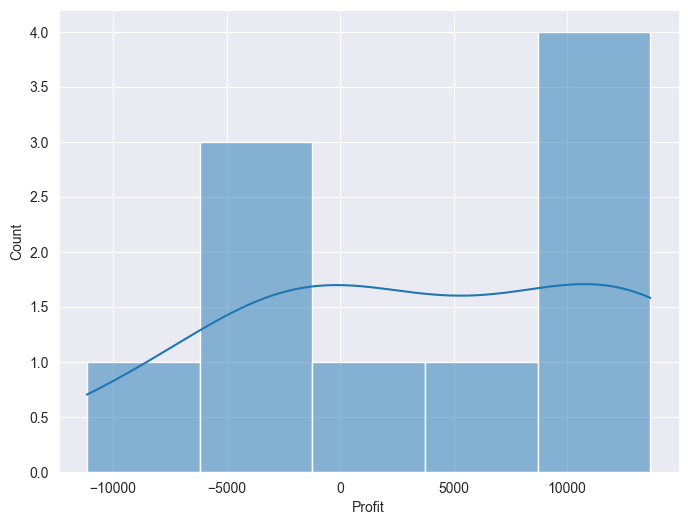

In [36]:
# Plotting the residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)

### Model Evaluation Insights

1. The R-squared value is 0.9347 which means that 93.47% of the variance in the dependent variable (Profit) is predictable from the independent variables (R&D Spend, Administration, Marketing Spend, State). This is a good value as it is close to 1.
2. The Adjusted R-squared value is 0.9117 which is also a good value as it is close to the R-squared value. It is used to account for the number of independent variables in the model.
3. The Mean Squared Error (MSE) is 83502864.03 is very high.
4. An RMSE of 9137.99 means that the typical error in predictions of Profit is about $9138.

The model should be fitting well according to the R-squared value, and although the MSE seems large, the RMSE shows us that considering that the profit range is between 14681.40 and 192261.83, shows we have a range of the model being from not good, to maybe good. (anywhere between 60% and 10% of deviation from the actual profit). The admin and state features may not be good indicators when applying linear regression, so let's try measuring performance without it.

In [37]:
features = dataframe.drop(
    ["Profit", "Administration", "State_Florida", "State_New York"], axis=1
)
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=0
)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r2 = metrics.r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")

# Adjusted R-squared value
n = len(X_test)
p = len(X_test.columns)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared value: {adjusted_r2}")

# Mean Squared Error (MSE) - the average of the squares of the errors
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error (RMSE) - the square root of the mean of the squared errors
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Mean Absolute Error (MAE) - the average of the absolute errors
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

R-squared value: 0.9474386447268488
Adjusted R-squared value: 0.9324211146488056
Mean Squared Error: 67220275.3756813
Root Mean Squared Error: 8198.797190788493
Mean Absolute Error: 6886.594588246507


### Model Evaluation Insights

Removing the administration **and** state fields improved the performance, but also not by much. We dropped our average price discrepancy by about $1000 but it didn't make too much difference. Part of the reason might be we just don't have enough data for each data point.

In [38]:
df = pd.DataFrame(
    {
        "Actual": y_test.values,
        "Predicted": y_pred,
        "Difference": y_test.values - y_pred,
    }
)
df

,Actual,Predicted,Difference
0,103282.38,102284.646052,997.733948
1,144259.40,133873.923838,10385.476162
2,146121.95,134182.149517,11939.800483
3,77798.83,73701.106936,4097.723064
4,191050.39,180642.252997,10408.137003
5,105008.31,114717.249039,-9708.939039
6,81229.06,68335.075753,12893.984247
7,97483.56,97433.459223,50.100777
8,110352.25,114580.921365,-4228.671365
9,166187.94,170343.319795,-4155.379795
